In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
plot_folder = "plots/data_distribution/N4/"

In [11]:
dfucb = [
    pd.read_table("params/N4/simulation_params_N4C0.0.dat", sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','cond_entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc']),
    pd.read_table("params/N4/simulation_params_N4C0.01.dat", sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','cond_entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc']),
    pd.read_table("params/N4/simulation_params_N4C0.05.dat", sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','cond_entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc']),
    pd.read_table("params/N4/simulation_params_N4C0.08.dat", sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','cond_entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc']),
    pd.read_table("params/N4/simulation_params_N4C0.1.dat", sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','cond_entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc']),
    pd.read_table("params/N4/simulation_params_N4C0.3.dat", sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','cond_entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc']),
    pd.read_table("params/N4/simulation_params_N4C0.5.dat", sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','cond_entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc']),
    pd.read_table("params/N4/simulation_params_N4C0.7.dat", sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','cond_entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc']),
    pd.read_table("params/N4/simulation_params_N4C1.0.dat", sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','cond_entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc']),
    pd.read_table("params/N4/simulation_params_N4C2.0.dat", sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','cond_entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc']),
]

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '

In [22]:
dfucb[1]

,efficiency,inequality,n_efficiency,n_inequality,entropy,cond_entropy,frequency,info_per_agent,int_entropy,ineq_slope,emax_perc
0,0.485687,0.309125,0.123894,0.078854,0.263006,0.002602,0.5,0.500,0.998745,5.057118e-06,0.9960
1,0.482756,0.411023,0.123673,0.105290,0.024503,0.012243,1.0,0.000,0.996802,2.438066e-05,0.9900
2,0.485501,0.484972,0.124543,0.124407,0.037588,0.018767,1.0,0.000,0.997235,2.087986e-06,0.9880
3,0.384158,0.138131,0.162892,0.056900,0.327553,0.058721,0.5,0.375,0.909668,3.456945e-05,0.5240
4,0.494194,0.004304,0.247569,0.002156,0.250000,0.000000,0.5,1.000,0.999500,-1.556011e-06,1.0000
...,...,...,...,...,...,...,...,...,...,...,...
596,0.483289,0.490274,0.124103,0.125897,0.020649,0.015095,1.0,0.000,0.997085,1.277996e-06,0.9915
597,0.371128,0.338668,0.100624,0.091923,0.257805,0.004278,0.5,0.500,0.998934,-1.478244e-07,0.9970
598,0.386735,0.231561,0.126423,0.075148,0.257710,0.004028,0.5,0.250,0.903733,4.273638e-05,0.4985
599,0.455245,0.213815,0.145402,0.067960,0.252852,0.001426,0.5,0.500,0.999311,3.883778e-05,0.9990


In [28]:
dfucb[2]['frequency'].describe()

count    601.000000
mean       0.643721
std        0.241138
min        0.002222
25%        0.500000
50%        0.500000
75%        1.000000
max        1.000000
Name: frequency, dtype: float64

In [13]:
#for d in df:
#    d['efficiency'].describe()

In [14]:
Cs = [0,0.01,0.05,0.08,0.1,0.3,0.5,0.7,1.0,2.0]

In [15]:
#To bypass a bug in _define_bin_edges, _statistics.py, that generates an error in bins 
if dfucb[0]['cond_entropy'].sum() == 0:
    dfucb[0].loc[0,'cond_entropy'] = 1.e-1
#dfucb[0]

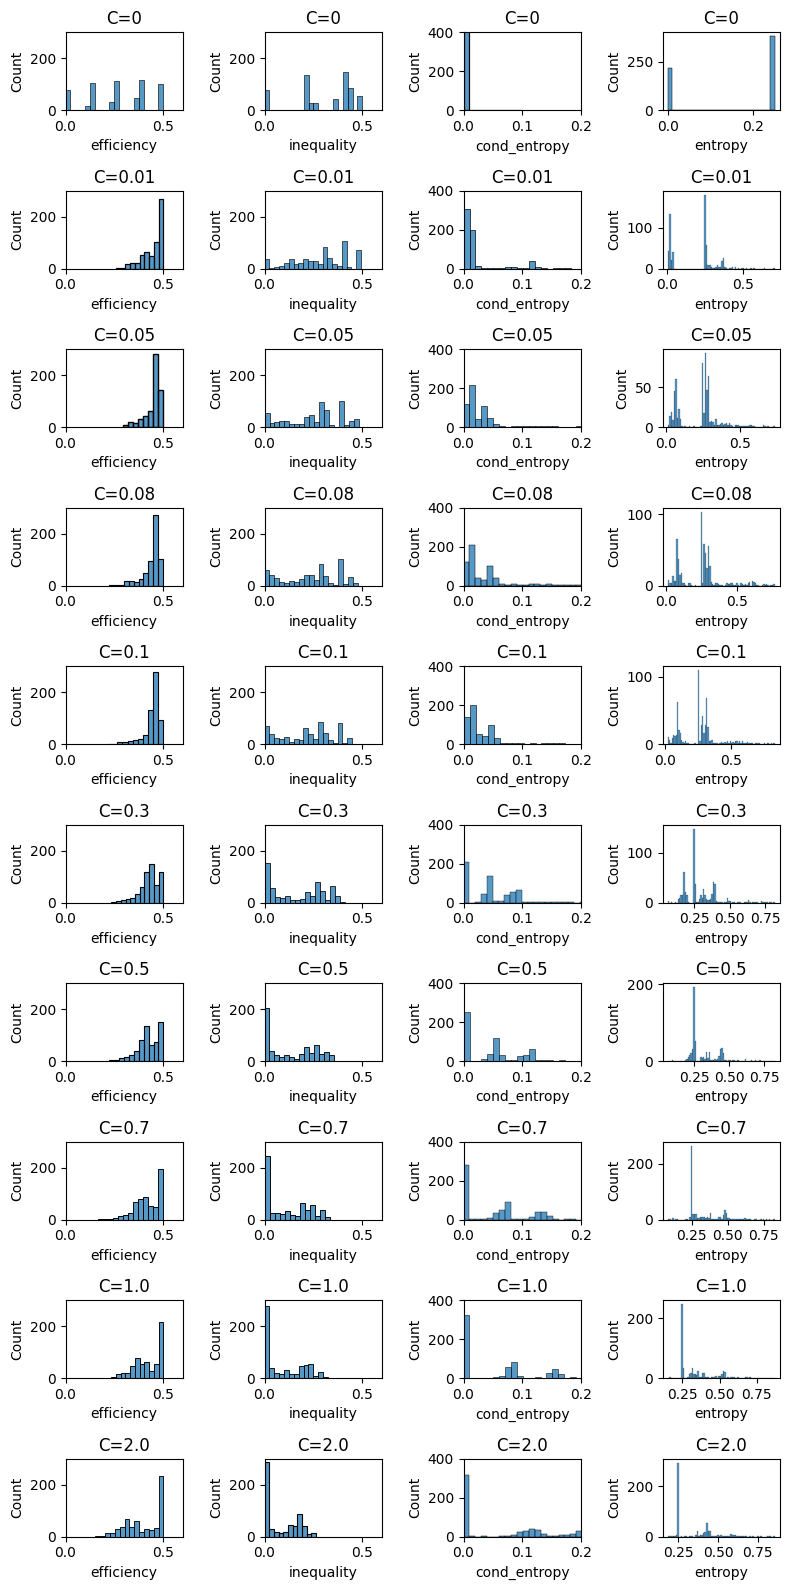

In [21]:
nr = len(dfucb)
nc = 4
fig0, ax = plt.subplots(nrows=nr,ncols=nc,figsize=(8,16))
for i in range(0,nr):
    pa = sns.histplot(data=dfucb[i], ax=ax[i,0], x='efficiency', binwidth=0.025)
    pb = sns.histplot(data=dfucb[i], ax=ax[i,1], x='inequality', binwidth=0.025)
    pc = sns.histplot(data=dfucb[i], ax=ax[i,2], x='cond_entropy', binwidth=0.01)
    pd = sns.histplot(data=dfucb[i], ax=ax[i,3], x='entropy', binwidth=0.01)
    pa.set_title('C='+str(Cs[i]))
    pb.set_title('C='+str(Cs[i]))
    pc.set_title('C='+str(Cs[i]))
    pd.set_title('C='+str(Cs[i]))
    pa.set_xlim(0,0.6)
    pa.set_ylim(0,300)
    pb.set_xlim(0,0.6)
    pb.set_ylim(0,300)
    pc.set_xlim(0,0.2)
    pc.set_ylim(0,400)
    #pd.set_xlim(0,0.2)
    #pd.set_ylim(0,400)
plt.tight_layout()
plt.savefig(plot_folder+'histograms.png')

In [17]:
#cvals = [0,0.2] 
#eff_means = [d.efficiency.mean() for d in dfucb]
#inq_means = [d.inequality.mean() for d in dfucb]
#plt.plot(cvals,eff_means)
#plt.plot(cvals,inq_means)